(kcorrect)=

# K-correct Photometry

This notebook shows how to obtain the K-correction of some photometry, first import the required packages.

In [1]:
from slsne.lcurve import get_kcorr, fit_map
from slsne.utils import get_lc
import numpy as np

First, lets import a test light curve from the reference data directory.

In [2]:
# Get a light curve
phot = get_lc('2013dg')
# Define the redshift and date of peak
redshift = 0.265
peak = 56447.62

Now we can fit the light curve with a mean SLSN map, either with respect to peak (`peak`) or explosion (`boom`).

In [3]:
stretch, amplitude, offset = fit_map(phot, redshift, peak=peak)
print(f"Best fit is a map with Stretch: {stretch:.2f}, Amplitude: {amplitude:.2f}, Offset: {offset:.2f}")

Best fit is a map with Stretch: 1.14, Amplitude: 0.05, Offset: -8.00


We can use these best-fit values to get the optical K-correction for the photometry

In [4]:
K_corr = get_kcorr(phot, redshift, peak = peak, stretch = stretch, offset = offset)

And finally plot the data

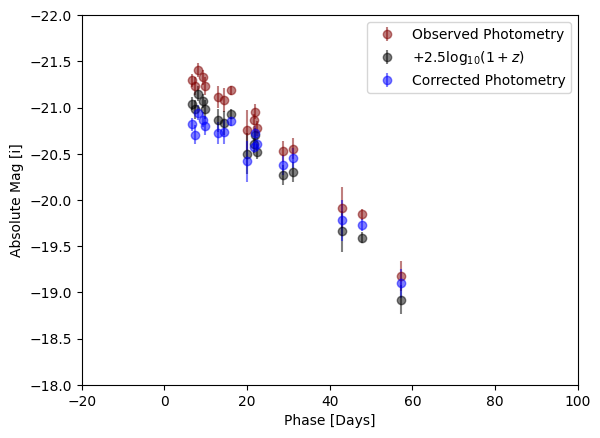

In [8]:
from slsne.utils import calc_DM, plot_colors
import matplotlib.pyplot as plt

# Select band to plot
band = 'i'
use = (phot['Filter'] == band) & (phot['UL'] == 'False')

# Calculate absolute magnitude
DM = calc_DM(redshift)
abs_mag = phot['Mag'][use] - DM

# Calculate Phase
phot['Phase'] = (phot['MJD'] - peak) / (1 + redshift)

# Apply the simple and the optimal K-correction
simple = abs_mag + 2.5 * np.log10(1 + redshift)
optimal = abs_mag - K_corr[use]

# Plot the light curves
plt.errorbar(phot['Phase'][use], abs_mag, yerr = phot['MagErr'][use], fmt = 'o',
             color = plot_colors(band), alpha = 0.5, label = 'Observed Photometry')
plt.errorbar(phot['Phase'][use], simple , yerr = phot['MagErr'][use], fmt = 'o',
             color = 'k', alpha = 0.5, label = r'$+ 2.5 \log_{10}(1 + z)$')
plt.errorbar(phot['Phase'][use], optimal, yerr = phot['MagErr'][use], fmt = 'o',
             color = 'b', alpha = 0.5, label = 'Corrected Photometry')

plt.legend(loc = 'upper right')
plt.ylim(-18, -22)
plt.xlim(-20, 100)
plt.xlabel('Phase [Days]')
plt.ylabel(f'Absolute Mag [{band}]')
plt.show();